In [1]:
%matplotlib inline

In [1]:
import math, keras, datetime, pandas as pd, numpy as np, keras.backend as K
import matplotlib.pyplot as plt, xgboost, operator, random, pickle

Using TensorFlow backend.
/home/jhoward/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from utils2 import *

Using TensorFlow backend.
/home/jhoward/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
np.set_printoptions(threshold=50, edgeitems=20)

In [4]:
limit_mem()

In [5]:
from isoweek import Week
from pandas_summary import DataFrameSummary

In [6]:
%cd data/rossman/

/data/jhoward/fast-image/nbs2/data/rossman


## Create datasets

In [8]:
def concat_csvs(dirname):
    os.chdir(dirname)
    filenames=glob.glob("*.csv")

    wrote_header = False
    with open("../"+dirname+".csv","w") as outputfile:
        for filename in filenames:
            name = filename.split(".")[0]
            with open(filename) as f:
                line = f.readline()
                if not wrote_header:
                    wrote_header = True
                    outputfile.write("file,"+line)
                for line in f:
                     outputfile.write(name + "," + line)
                outputfile.write("\n")

    os.chdir("..")

In [9]:
# concat_csvs('googletrend')
# concat_csvs('weather')

In [7]:
table_names = ['train', 'store', 'store_states', 'state_names', 
               'googletrend', 'weather', 'test']

In [8]:
tables = [pd.read_csv(fname+'.csv', low_memory=False) for fname in table_names]

In [35]:
from IPython.display import HTML

In [42]:
for t in tables: display(t.head())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Week,Day
0,1,5,2015-07-31,5263,555,1,1,False,1,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,False,1,2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,False,1,2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,False,1,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,False,1,2015,7,31,31


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


,Store,State
0,1,HE
1,2,TH
2,3,NW
3,4,BE
4,5,SN


,StateName,State
0,BadenWuerttemberg,BW
1,Bayern,BY
2,Berlin,BE
3,Brandenburg,BB
4,Bremen,HB


,file,week,trend,Date,State,Year,Month,Week,Day
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96,2012-12-02,SN,2012,12,48,2
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95,2012-12-09,SN,2012,12,49,9
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91,2012-12-16,SN,2012,12,50,16
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48,2012-12-23,SN,2012,12,51,23
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67,2012-12-30,SN,2012,12,52,30


,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,...,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,NordrheinWestfalen,2013-01-01,8,4,2,7,5,1,94,87,...,31.0,12.0,4.0,39,26,58.0,5.08,6.0,Rain,215
1,NordrheinWestfalen,2013-01-02,7,4,1,5,3,2,93,85,...,31.0,14.0,10.0,24,16,NaN,0.00,6.0,Rain,225
2,NordrheinWestfalen,2013-01-03,11,8,6,10,8,4,100,93,...,31.0,8.0,2.0,26,21,NaN,1.02,7.0,Rain,240
3,NordrheinWestfalen,2013-01-04,9,9,8,9,9,8,100,94,...,11.0,5.0,2.0,23,14,NaN,0.25,7.0,Rain,263
4,NordrheinWestfalen,2013-01-05,8,8,7,8,7,6,100,94,...,10.0,6.0,3.0,16,10,NaN,0.00,7.0,Rain,268


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Week,Day
0,1,1,4,2015-09-17,1.0,1,False,0,2015,9,38,17
1,2,3,4,2015-09-17,1.0,1,False,0,2015,9,38,17
2,3,7,4,2015-09-17,1.0,1,False,0,2015,9,38,17
3,4,8,4,2015-09-17,1.0,1,False,0,2015,9,38,17
4,5,9,4,2015-09-17,1.0,1,False,0,2015,9,38,17


In [41]:
for t in tables: display(DataFrameSummary(t).summary())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Week,Day
count,1.01721e+06,1.01721e+06,NaN,1.01721e+06,1.01721e+06,1.01721e+06,1.01721e+06,NaN,1.01721e+06,1.01721e+06,1.01721e+06,1.01721e+06,1.01721e+06
mean,558.43,3.99834,NaN,5773.82,633.146,0.830107,0.381515,NaN,0.178647,2013.83,5.84676,23.6155,15.7028
std,321.909,1.99739,NaN,3849.93,464.412,0.375539,0.485759,NaN,0.383056,0.777396,3.3261,14.4334,8.78764
min,1,1,NaN,0,0,0,0,NaN,0,2013,1,1,1
25%,280,2,NaN,3727,405,1,0,NaN,0,2013,3,11,8
50%,558,4,NaN,5744,609,1,0,NaN,0,2014,6,22,16
75%,838,6,NaN,7856,837,1,1,NaN,0,2014,8,35,23
max,1115,7,NaN,41551,7388,1,1,NaN,1,2015,12,52,31
counts,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209
uniques,1115,7,942,21734,4086,2,2,2,2,3,12,52,31


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115,NaN,NaN,1112,761,761,1115,571,571,NaN
mean,558,NaN,NaN,5404.9,7.2247,2008.67,0.512108,23.5954,2011.76,NaN
std,322.017,NaN,NaN,7663.17,3.21235,6.19598,0.500078,14.142,1.67494,NaN
min,1,NaN,NaN,20,1,1900,0,1,2009,NaN
25%,279.5,NaN,NaN,717.5,4,2006,0,13,2011,NaN
50%,558,NaN,NaN,2325,8,2010,1,22,2012,NaN
75%,836.5,NaN,NaN,6882.5,10,2013,1,37,2013,NaN
max,1115,NaN,NaN,75860,12,2015,1,50,2015,NaN
counts,1115,1115,1115,1112,761,761,1115,571,571,571
uniques,1115,4,3,654,12,23,2,24,7,3


,Store,State
count,1115,NaN
mean,558,NaN
std,322.017,NaN
min,1,NaN
25%,279.5,NaN
50%,558,NaN
75%,836.5,NaN
max,1115,NaN
counts,1115,1115
uniques,1115,12


,StateName,State
count,16,16
unique,16,16
top,SchleswigHolstein,BW
freq,1,1
counts,16,16
uniques,16,16
missing,0,0
missing_perc,0%,0%
types,unique,unique


,file,week,trend,Date,State,Year,Month,Week,Day
count,NaN,NaN,2072,NaN,NaN,2072,2072,2072,2072
mean,NaN,NaN,63.8142,NaN,NaN,2013.84,6.33784,25.5811,15.6959
std,NaN,NaN,12.6502,NaN,NaN,0.852173,3.40303,14.8587,8.83746
min,NaN,NaN,0,NaN,NaN,2012,1,1,1
25%,NaN,NaN,55,NaN,NaN,2013,3,13,8
50%,NaN,NaN,64,NaN,NaN,2014,6,25,16
75%,NaN,NaN,72,NaN,NaN,2015,9,37.25,23
max,NaN,NaN,100,NaN,NaN,2015,12,52,31
counts,2072,2072,2072,2072,1924,2072,2072,2072,2072
uniques,14,148,68,148,13,4,12,52,31


,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,...,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
count,NaN,NaN,15840,15840,15840,15840,15840,15840,15840,15840,...,15459,15459,15459,15840,15840,3604,15840,14667,NaN,15840
mean,NaN,NaN,14.6441,10.389,6.19899,8.58782,6.20581,3.62614,93.6596,74.2829,...,24.0576,12.2398,7.02516,22.7666,11.9722,48.8643,0.831718,5.55131,NaN,175.897
std,NaN,NaN,8.64601,7.37926,6.52639,6.24478,6.08677,6.12839,7.67853,13.4866,...,8.9768,5.06794,4.9806,8.98862,5.87284,13.027,2.51351,1.68771,NaN,101.589
min,NaN,NaN,-11,-13,-15,-14,-15,-73,44,30,...,0,0,0,3,2,21,0,0,NaN,-1
25%,NaN,NaN,8,4,1,4,2,-1,90.75,65,...,14,10,3,16,8,39,0,5,NaN,80
50%,NaN,NaN,15,11,7,9,7,4,94,76,...,31,11,7,21,11,48,0,6,NaN,202
75%,NaN,NaN,21,16,11,13,11,8,100,85,...,31,14,10,27,14,55,0.25,7,NaN,256
max,NaN,NaN,39,31,24,25,20,19,100,100,...,31,31,31,101,53,111,58.93,8,NaN,360
counts,15840,15840,15840,15840,15840,15840,15840,15840,15840,15840,...,15459,15459,15459,15840,15840,3604,15840,14667,11889,15840
uniques,16,990,51,45,40,40,36,40,53,71,...,24,32,24,44,29,47,41,9,21,362


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Week,Day
count,41088,41088,41088,NaN,41077,41088,NaN,41088,41088,41088,41088,41088
mean,20544.5,555.9,3.97917,NaN,0.854322,0.395833,NaN,0.443487,2015,8.35417,34.6458,13.5208
std,11861.2,320.274,2.01548,NaN,0.352787,0.489035,NaN,0.496802,0,0.478266,2.01548,8.44845
min,1,1,1,NaN,0,0,NaN,0,2015,8,31,1
25%,10272.8,279.75,2,NaN,1,0,NaN,0,2015,8,33,6.75
50%,20544.5,553.5,4,NaN,1,0,NaN,0,2015,8,35,12.5
75%,30816.2,832.25,6,NaN,1,1,NaN,1,2015,9,36,19.25
max,41088,1115,7,NaN,1,1,NaN,1,2015,9,38,31
counts,41088,41088,41088,41088,41077,41088,41088,41088,41088,41088,41088,41088
uniques,41088,856,7,48,2,2,2,2,1,2,8,31


In [9]:
train, store, store_states, state_names, googletrend, weather, test = tables

In [17]:
len(train),len(test)

(1017209, 41088)

In [10]:
train.StateHoliday = train.StateHoliday!='0'
test.StateHoliday = test.StateHoliday!='0'

In [44]:
def join_df(left, right, left_on, right_on=None):
    if right_on is None: right_on = left_on
    return left.merge(right, how='left', left_on=left_on, right_on=right_on, 
                      suffixes=("", "_y"))

In [45]:
weather = join_df(weather, state_names, "file", "StateName")

In [46]:
googletrend['Date'] = googletrend.week.str.split(' - ', expand=True)[0]
googletrend['State'] = googletrend.file.str.split('_', expand=True)[2]
googletrend.ix[googletrend.State=='NI', "State"] = 'HB,NI'

In [47]:
def add_datepart(df):
    df.Date = pd.to_datetime(df.Date)
    df["Year"] = df.Date.dt.year
    df["Month"] = df.Date.dt.month
    df["Week"] = df.Date.dt.week
    df["Day"] = df.Date.dt.day

In [48]:
add_datepart(weather)
add_datepart(googletrend)
add_datepart(train)
add_datepart(test)

In [49]:
trend_de = googletrend[googletrend.file == 'Rossmann_DE']

In [50]:
store = join_df(store, store_states, "Store")
len(store[store.State.isnull()])

0

In [51]:
joined = join_df(train, store, "Store")
len(joined[joined.StoreType.isnull()])

0

In [52]:
joined = join_df(joined, googletrend, ["State","Year", "Week"])
len(joined[joined.trend.isnull()])

0

In [53]:
joined = joined.merge(trend_de, 'left', ["Year", "Week"], suffixes=('', '_DE'))
len(joined[joined.trend_DE.isnull()])

0

In [54]:
joined = join_df(joined, weather, ["State","Date"])
len(joined[joined.Mean_TemperatureC.isnull()])

0

In [55]:
joined_test = test.merge(store, how='left', left_on='Store', right_index=True)
len(joined_test[joined_test.StoreType.isnull()])

48

In [56]:
joined.CompetitionOpenSinceYear = joined.CompetitionOpenSinceYear.fillna(1900).astype(np.int32)
joined.CompetitionOpenSinceMonth = joined.CompetitionOpenSinceMonth.fillna(1).astype(np.int32)
joined.Promo2SinceYear = joined.Promo2SinceYear.fillna(1900).astype(np.int32)
joined.Promo2SinceWeek = joined.Promo2SinceWeek.fillna(1).astype(np.int32)

In [57]:
joined["CompetitionOpenSince"] = pd.to_datetime(joined.apply(lambda x: datetime.datetime(
    x.CompetitionOpenSinceYear, x.CompetitionOpenSinceMonth, 15), axis=1).astype(pd.datetime))
joined["CompetitionDaysOpen"] = joined.Date.subtract(joined["CompetitionOpenSince"]).dt.days

In [58]:
joined.loc[joined.CompetitionDaysOpen<0, "CompetitionDaysOpen"] = 0
joined.loc[joined.CompetitionOpenSinceYear<1990, "CompetitionDaysOpen"] = 0

In [59]:
joined["CompetitionMonthsOpen"] = joined["CompetitionDaysOpen"]//30
joined.loc[joined.CompetitionMonthsOpen>24, "CompetitionMonthsOpen"] = 24
joined.CompetitionMonthsOpen.unique()

array([24,  3, 19,  9,  0, 16, 17,  7, 15, 22, 11, 13,  2, 23, 12,  4, 10,
        1, 14, 20,  8, 18,  6, 21,  5])

In [193]:
joined["Promo2Since"] = pd.to_datetime(joined.apply(lambda x: Week(
    x.Promo2SinceYear, x.Promo2SinceWeek).monday(), axis=1).astype(pd.datetime))
joined["Promo2Days"] = joined.Date.subtract(joined["Promo2Since"]).dt.days

In [ ]:
joined.loc[joined.Promo2Days<0, "Promo2Days"] = 0
joined.loc[joined.Promo2SinceYear<1990, "Promo2Days"] = 0

In [49]:
joined["Promo2Weeks"] = joined["Promo2Days"]//7
joined.loc[joined.Promo2Weeks<0, "Promo2Weeks"] = 0
joined.loc[joined.Promo2Weeks>25, "Promo2Weeks"] = 25
joined.Promo2Weeks.unique()

array([25, 17,  8, 13, 24, 16,  7, 12, 23, 15,  6, 11, 22, 14,  5, 10, 21,
        4,  9, 20,  3, 19,  2, 18,  1,  0])

## Durations

In [719]:
columns = ["Date", "Store", "Promo", "StateHoliday", "SchoolHoliday"]

In [720]:
class elapsed(object):
    def __init__(self, fld):
        self.fld = fld
        self.last = pd.to_datetime(np.nan)
        self.last_store = 0
        
    def get(self, row):
        if row.Store != self.last_store:
            self.last = pd.to_datetime(np.nan)
            self.last_store = row.Store
        if (row[self.fld]): self.last = row.Date
        return row.Date-self.last

In [721]:
df = train[columns]

In [722]:
def add_elapsed(fld, prefix):
    sh_el = elapsed(fld)
    df[prefix+fld] = df.apply(sh_el.get, axis=1)

In [723]:
fld = 'SchoolHoliday'
df = df.sort_values(['Store', 'Date'])
add_elapsed(fld, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
add_elapsed(fld, 'Before')

In [724]:
fld = 'StateHoliday'
df = df.sort_values(['Store', 'Date'])
add_elapsed(fld, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
add_elapsed(fld, 'Before')

In [725]:
fld = 'Promo'
df = df.sort_values(['Store', 'Date'])
add_elapsed(fld, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
add_elapsed(fld, 'Before')

In [726]:
df = df.set_index("Date")

In [727]:
columns = ['SchoolHoliday', 'StateHoliday', 'Promo']

In [728]:
for o in ['Before', 'After']:
    for p in columns:
        a = o+p
        df[a] = df[a].fillna(pd.Timedelta(0)).dt.days

In [729]:
bwd = df[['Store']+columns].sort_index().groupby("Store").rolling(7, min_periods=1).sum()

In [730]:
fwd = df[['Store']+columns].sort_index(ascending=False
                                      ).groupby("Store").rolling(7, min_periods=1).sum()

In [731]:
bwd.drop('Store',1,inplace=True)
bwd.reset_index(inplace=True)

In [732]:
fwd.drop('Store',1,inplace=True)
fwd.reset_index(inplace=True)

In [733]:
df.reset_index(inplace=True)

In [734]:
df = df.merge(bwd, 'left', ['Date', 'Store'], suffixes=['', '_bw'])
df = df.merge(fwd, 'left', ['Date', 'Store'], suffixes=['', '_fw'])

In [735]:
df.drop(columns,1,inplace=True)

In [736]:
df.head()

,Date,Store,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday,BeforeStateHoliday,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_fw,Promo_fw
0,2015-07-31,1,0,0,57,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
1,2015-07-30,1,0,0,56,0,0,0,4.0,0.0,4.0,2.0,0.0,2.0
2,2015-07-29,1,0,0,55,0,0,0,3.0,0.0,3.0,3.0,0.0,3.0
3,2015-07-28,1,0,0,54,0,0,0,2.0,0.0,2.0,4.0,0.0,4.0
4,2015-07-27,1,0,0,53,0,0,0,1.0,0.0,1.0,5.0,0.0,5.0


In [743]:
df.to_csv('df.csv')

In [33]:
df = pd.read_csv('df.csv', index_col=0)

In [142]:
df["Date"] = pd.to_datetime(df.Date)

In [34]:
df.columns

Index(['Date', 'Store', 'AfterSchoolHoliday', 'BeforeSchoolHoliday',
       'AfterStateHoliday', 'BeforeStateHoliday', 'AfterPromo', 'BeforePromo',
       'SchoolHoliday_bw', 'StateHoliday_bw', 'Promo_bw', 'SchoolHoliday_fw',
       'StateHoliday_fw', 'Promo_fw'],
      dtype='object')

In [746]:
joined = join_df(joined, df, ['Store', 'Date'])

In [50]:
joined.to_csv('joined.csv')

In [62]:
joined = pd.read_csv('joined.csv', index_col=0)
joined["Date"] = pd.to_datetime(joined.Date)
joined.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Week', 'Day',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'State', 'file',
       'week', 'trend', 'Date_y', 'Month_y', 'Day_y', 'file_y',
       'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
       'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC', 'Max_Humidity',
       'Mean_Humidity', 'Min_Humidity', 'Max_Sea_Level_PressurehPa',
       'Mean_Sea_Level_PressurehPa', 'Min_Sea_Level_PressurehPa',
       'Max_VisibilityKm', 'Mean_VisibilityKm', 'Min_VisibilitykM',
       'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h', 'Max_Gust_SpeedKm_h',
       'Precipitationmm', 'CloudCover', 'Events', 'WindDirDegrees',
       'StateName', 'Year_y', 'Month_y.1', 'Week_y', 'Day_y.1',
       'CompetitionOpenSince'

## Create features

In [65]:
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import LabelEncoder, Imputer, StandardScaler

In [66]:
cat_var_dict = {'Store': 50, 'DayOfWeek': 6, 'Year': 2, 'Month': 6,
'Day': 10, 'StateHoliday': 3, 'CompetitionMonthsOpen': 2,
'Promo2Weeks': 1, 'StoreType': 2, 'Assortment': 3, 'PromoInterval': 3,
'CompetitionOpenSinceYear': 4, 'Promo2SinceYear': 4, 'State': 6,
'Week': 2, 'Events': 4, 'Promo_fw': 1,
'Promo_bw': 1, 'StateHoliday_fw': 1,
'StateHoliday_bw': 1, 'SchoolHoliday_fw': 1,
'SchoolHoliday_bw': 1}

In [67]:
cat_vars = [o[0] for o in 
            sorted(cat_var_dict.items(), key=operator.itemgetter(1), reverse=True)]

In [68]:
"""cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday',
           'StoreType', 'Assortment', 'Week', 'Events', 'Promo2SinceYear',
            'CompetitionOpenSinceYear', 'PromoInterval', 'Promo', 'SchoolHoliday', 'State']"""

"cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday',\n           'StoreType', 'Assortment', 'Week', 'Events', 'Promo2SinceYear',\n            'CompetitionOpenSinceYear', 'PromoInterval', 'Promo', 'SchoolHoliday', 'State']"

In [69]:
# mean/max wind; min temp; cloud; min/mean humid; 
contin_vars = ['CompetitionDistance', 
   'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']

In [70]:
"""contin_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 
   'Max_Humidity', 'trend', 'trend_DE', 'AfterStateHoliday', 'BeforeStateHoliday']"""

"contin_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', \n   'Max_Humidity', 'trend', 'trend_DE', 'AfterStateHoliday', 'BeforeStateHoliday']"

In [71]:
for v in contin_vars: joined.ix[joined[v].isnull(), v] = 0
for v in cat_vars: joined.ix[joined[v].isnull(), v] = ""

In [72]:
cat_maps = [(o, LabelEncoder()) for o in cat_vars]
contin_maps = [([o], StandardScaler()) for o in contin_vars]

In [73]:
cat_mapper = DataFrameMapper(cat_maps)
cat_map_fit = cat_mapper.fit(joined)
cat_cols = len(cat_map_fit.features)
cat_cols

22

In [74]:
contin_mapper = DataFrameMapper(contin_maps)
contin_map_fit = contin_mapper.fit(joined)
contin_cols = len(contin_map_fit.features)
contin_cols

/home/jhoward/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


16

In [78]:
cat_map_fit.transform(joined)[0,:5], contin_map_fit.transform(joined)[0,:5]

/home/jhoward/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


(array([ 0, 30,  4,  6,  4]),
 array([-0.53772351,  1.02444552,  0.81863226,  0.32504749,  0.61112004]))

In [283]:
pickle.dump(contin_map_fit, open('contin_maps.pickle', 'wb'))
pickle.dump(cat_map_fit, open('cat_maps.pickle', 'wb'))

In [75]:
[len(o[1].classes_) for o in cat_map_fit.features]

[1115, 31, 7, 12, 12, 23, 8, 22, 2, 3, 4, 3, 57, 4, 52, 26, 6, 6, 3, 3, 8, 8]

## Sample data

In [79]:
joined_sales = joined[joined.Sales!=0]
n = len(joined_sales)

In [80]:
n

844338

In [327]:
samp_size = 100000
np.random.seed(42)
idxs = sorted(np.random.choice(n, samp_size, replace=False))

In [1205]:
joined_samp = joined_sales.iloc[idxs].set_index("Date")

In [375]:
samp_size = n
joined_samp = joined_sales.set_index("Date")

In [ ]:
train_ratio = 0.9
train_size = int(samp_size * train_ratio)

In [400]:
train_size

759904

In [73]:
joined_valid = joined_samp[train_size:]
joined_train = joined_samp[:train_size]
len(joined_valid), len(joined_train)

(84434, 759904)

In [74]:
def cat_preproc(dat):
    return cat_map_fit.transform(dat).astype(np.int64)

In [75]:
cat_map_train = cat_preproc(joined_train)
cat_map_valid = cat_preproc(joined_valid)

In [76]:
def contin_preproc(dat):
    return contin_map_fit.transform(dat).astype(np.float32)

In [77]:
contin_map_train = contin_preproc(joined_train)
contin_map_valid = contin_preproc(joined_valid)

/home/jhoward/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [78]:
y_train_orig = joined_train.Sales
y_valid_orig = joined_valid.Sales

In [79]:
max_log_y = np.max(np.log(joined_samp.Sales))
y_train = np.log(y_train_orig)/max_log_y
y_valid = np.log(y_valid_orig)/max_log_y

In [1066]:
"""#y_train = np.log(y_train)
ymean=y_train_orig.mean()
ystd=y_train_orig.std()
y_train = (y_train_orig-ymean)/ystd
#y_valid = np.log(y_valid)
y_valid = (y_valid_orig-ymean)/ystd"""

'#y_train = np.log(y_train)\nymean=y_train_orig.mean()\nystd=y_train_orig.std()\ny_train = (y_train_orig-ymean)/ystd\n#y_valid = np.log(y_valid)\ny_valid = (y_valid_orig-ymean)/ystd'

In [ ]:
def rmspe(y_pred, targ = y_valid_orig):
    pct_var = (targ - y_pred)/targ
    return math.sqrt(np.square(pct_var).mean())

In [ ]:
def log_max_inv(preds, mx = max_log_y):
    return np.exp(preds * mx)

In [80]:
def normalize_inv(preds):
    return preds * ystd + ymean

## Create models

In [739]:
"""
1 97s - loss: 0.0104 - val_loss: 0.0083
2 93s - loss: 0.0076 - val_loss: 0.0076
3 90s - loss: 0.0071 - val_loss: 0.0076
4 90s - loss: 0.0068 - val_loss: 0.0075
5 93s - loss: 0.0066 - val_loss: 0.0075
6 95s - loss: 0.0064 - val_loss: 0.0076
7 98s - loss: 0.0063 - val_loss: 0.0077
8 97s - loss: 0.0062 - val_loss: 0.0075
9 95s - loss: 0.0061 - val_loss: 0.0073
0 101s - loss: 0.0061 - val_loss: 0.0074
"""

'\n1 97s - loss: 0.0104 - val_loss: 0.0083\n2 93s - loss: 0.0076 - val_loss: 0.0076\n3 90s - loss: 0.0071 - val_loss: 0.0076\n4 90s - loss: 0.0068 - val_loss: 0.0075\n5 93s - loss: 0.0066 - val_loss: 0.0075\n6 95s - loss: 0.0064 - val_loss: 0.0076\n7 98s - loss: 0.0063 - val_loss: 0.0077\n8 97s - loss: 0.0062 - val_loss: 0.0075\n9 95s - loss: 0.0061 - val_loss: 0.0073\n0 101s - loss: 0.0061 - val_loss: 0.0074\n'

In [85]:
def split_cols(arr): return np.hsplit(arr,arr.shape[1])

In [86]:
map_train = split_cols(cat_map_train) + [contin_map_train]
map_valid = split_cols(cat_map_valid) + [contin_map_valid]

In [87]:
map_train = split_cols(cat_map_train) + split_cols(contin_map_train)
map_valid = split_cols(cat_map_valid) + split_cols(contin_map_valid)

In [88]:
def cat_map_info(feat): return feat[0], len(feat[1].classes_)

In [89]:
cat_map_info(cat_map_fit.features[1])

('Day', 31)

In [90]:
def my_init(scale):
    return lambda shape, name=None: initializations.uniform(shape, scale=scale, name=name)

In [91]:
def emb_init(shape, name=None): 
    return initializations.uniform(shape, scale=2/(shape[1]+1), name=name)

In [293]:
def get_emb(feat):
    name, c = cat_map_info(feat)
    #c2 = cat_var_dict[name]
    c2 = (c+1)//2
    if c2>50: c2=50
    inp = Input((1,), dtype='int64', name=name+'_in')
    # , W_regularizer=l2(1e-6)
    u = Flatten(name=name+'_flt')(Embedding(c, c2, input_length=1, init=emb_init)(inp))
#     u = Flatten(name=name+'_flt')(Embedding(c, c2, input_length=1)(inp))
    return inp,u

In [93]:
def get_contin(feat):
    name = feat[0][0]
    inp = Input((1,), name=name+'_in')
    return inp, Dense(1, name=name+'_d', init=my_init(1.))(inp)

In [94]:
contin_inp = Input((contin_cols,), name='contin')
contin_out = Dense(contin_cols*10, activation='relu', name='contin_d')(contin_inp)
#contin_out = BatchNormalization()(contin_out)

In [758]:
embs = [get_emb(feat) for feat in cat_map_fit.features]
#conts = [get_contin(feat) for feat in contin_map_fit.features]
#contin_d = [d for inp,d in conts]
x = merge([emb for inp,emb in embs] + [contin_out], mode='concat')
#x = merge([emb for inp,emb in embs] + contin_d, mode='concat')

x = Dropout(0.02)(x)
x = Dense(1000, activation='relu', init='uniform')(x)
x = Dense(500, activation='relu', init='uniform')(x)
x = Dropout(0.2)(x)
x = Dense(1, activation='sigmoid')(x)

model = Model([inp for inp,emb in embs] + [contin_inp], x)
#model = Model([inp for inp,emb in embs] + [inp for inp,d in conts], x)
model.compile('adam', 'mean_absolute_error')
#model.compile(Adam(), 'mse')

### Start training

In [756]:
%%time 
hist = model.fit(map_train, y_train, batch_size=128, nb_epoch=25,
                 verbose=0, validation_data=(map_valid, y_valid))

CPU times: user 11min 24s, sys: 1min 33s, total: 12min 57s
Wall time: 5min 58s


In [133]:
hist.history

{'loss': [0.017763014663192959,
  0.011433798792295986,
  0.010516694221132331,
  0.0098951324205597234,
  0.0093967079764604566,
  0.0090409253494607086,
  0.0087176129839817689,
  0.0083871925427847441,
  0.0081409312105178832,
  0.0079449998010363843],
 'val_loss': [0.013183931291202704,
  0.012660176647603511,
  0.01246179387887319,
  0.012995950489441554,
  0.012145203327039878,
  0.011319018259445826,
  0.01145879974504312,
  0.01087024861852328,
  0.012571461255550384,
  0.010759200275043646]}

In [ ]:
plot_train(hist)

In [ ]:
preds = np.squeeze(model.predict(map_valid, 1024))

Result on validation data:  0.1678 (samp 150k, 0.75 trn)

In [ ]:
log_max_inv(preds)

In [1056]:
normalize_inv(preds)

0.11097331560266578

## Using 3rd place data

In [377]:
pkl_path = '/data/jhoward/github/entity-embedding-rossmann/'

In [401]:
def load_pickle(fname): 
    return pickle.load(open(pkl_path+fname + '.pickle', 'rb'))

In [402]:
[x_pkl_orig, y_pkl_orig] = load_pickle('feature_train_data')

In [403]:
max_log_y_pkl = np.max(np.log(y_pkl_orig))
y_pkl = np.log(y_pkl_orig)/max_log_y_pkl

In [404]:
pkl_vars = ['Open', 'Store', 'DayOfWeek', 'Promo', 'Year', 'Month', 'Day', 
     'StateHoliday', 'SchoolHoliday', 'CompetitionMonthsOpen', 'Promo2Weeks', 
    'Promo2Weeks_L', 'CompetitionDistance',
    'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear',
    'Promo2SinceYear', 'State', 'Week', 'Max_TemperatureC', 'Mean_TemperatureC', 
    'Min_TemperatureC', 'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
    'Mean_Wind_SpeedKm_h', 'CloudCover','Events', 'Promo_fw', 'Promo_bw', 
    'StateHoliday_fw', 'StateHoliday_bw', 'AfterStateHoliday', 'BeforeStateHoliday', 
    'SchoolHoliday_fw', 'SchoolHoliday_bw', 'trend_DE', 'trend']

In [405]:
x_pkl = np.array(x_pkl_orig)

In [406]:
gt_enc = StandardScaler()
gt_enc.fit(x_pkl[:,-2:])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [407]:
x_pkl[:,-2:] = gt_enc.transform(x_pkl[:,-2:])

In [408]:
x_pkl.shape

(844338, 40)

In [386]:
x_pkl = x_pkl[idxs]
y_pkl = y_pkl[idxs]

In [409]:
x_pkl_trn, x_pkl_val = x_pkl[:train_size], x_pkl[train_size:]
y_pkl_trn, y_pkl_val = y_pkl[:train_size], y_pkl[train_size:]

In [355]:
x_pkl_trn.shape

(90000, 40)

In [179]:
xgb_parms = {'learning_rate': 0.1, 'subsample': 0.6, 
             'colsample_bylevel': 0.6, 'silent': True, 'objective': 'reg:linear'}

In [180]:
xdata_pkl = xgboost.DMatrix(x_pkl_trn, y_pkl_trn, feature_names=pkl_vars)

In [181]:
xdata_val_pkl = xgboost.DMatrix(x_pkl_val, y_pkl_val, feature_names=pkl_vars)

In [182]:
xgb_parms['seed'] = random.randint(0,1e9)
model_pkl = xgboost.train(xgb_parms, xdata_pkl)

In [183]:
model_pkl.eval(xdata_val_pkl)

b'[0]\teval-rmse:0.120945'

In [ ]:
#0.117473

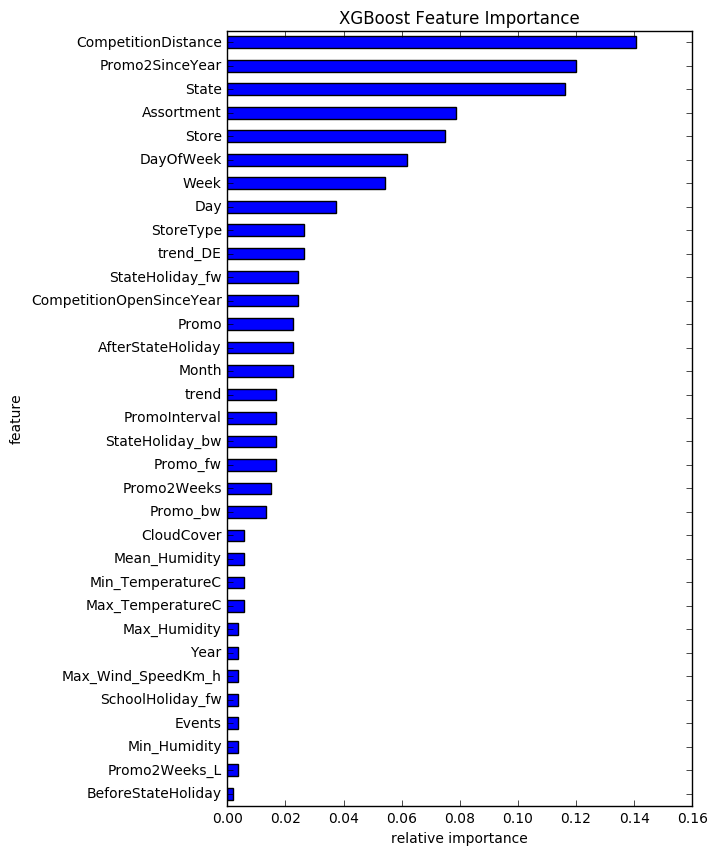

In [184]:
importance = model_pkl.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1))

df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance');

### Neural net

In [410]:
#np.savez_compressed('vars.npz', pkl_cats, pkl_contins)
#np.savez_compressed('deps.npz', y_pkl)

In [411]:
pkl_cats = np.stack([x_pkl[:,pkl_vars.index(f)] for f in cat_vars], 1)
pkl_contins = np.stack([x_pkl[:,pkl_vars.index(f)] for f in contin_vars], 1)

In [412]:
co_enc = StandardScaler().fit(pkl_contins)
pkl_contins = co_enc.transform(pkl_contins)

In [413]:
pkl_contins_trn, pkl_contins_val = pkl_contins[:train_size], pkl_contins[train_size:]
pkl_cats_trn, pkl_cats_val = pkl_cats[:train_size], pkl_cats[train_size:]
y_pkl_trn, y_pkl_val = y_pkl[:train_size], y_pkl[train_size:]

In [414]:
def get_emb_pkl(feat):
    name, c = cat_map_info(feat)
    c2 = (c+2)//3
    if c2>50: c2=50
    inp = Input((1,), dtype='int64', name=name+'_in')
    u = Flatten(name=name+'_flt')(Embedding(c, c2, input_length=1, init=emb_init)(inp))
    return inp,u

In [415]:
n_pkl_contin = pkl_contins_trn.shape[1]
contin_inp = Input((n_pkl_contin,), name='contin')
contin_out = BatchNormalization()(contin_inp)

In [416]:
map_train_pkl = split_cols(pkl_cats_trn) + [pkl_contins_trn]
map_valid_pkl = split_cols(pkl_cats_val) + [pkl_contins_val]

In [417]:
def train_pkl(bs=128, ne=10):
    return model_pkl.fit(map_train_pkl, y_pkl_trn, batch_size=bs, nb_epoch=ne,
                 verbose=0, validation_data=(map_valid_pkl, y_pkl_val))

In [418]:
def get_model_pkl(): 
    conts = [get_contin_pkl(feat) for feat in contin_map_fit.features]
    embs = [get_emb_pkl(feat) for feat in cat_map_fit.features]
    x = merge([emb for inp,emb in embs] + [contin_out], mode='concat')

    x = Dropout(0.02)(x)
    x = Dense(1000, activation='relu', init='uniform')(x)
    x = Dense(500, activation='relu', init='uniform')(x)
    x = Dense(1, activation='sigmoid')(x)

    model_pkl = Model([inp for inp,emb in embs] + [contin_inp], x)
    model_pkl.compile('adam', 'mean_absolute_error')
    #model.compile(Adam(), 'mse')
    return model_pkl

In [458]:
model_pkl = get_model_pkl()

In [459]:
train_pkl(128, 10).history['val_loss']

[0.0086286964193351811,
 0.0080550193002727963,
 0.0080270905797575273,
 0.00833844816263264,
 0.0078600179936998815,
 0.007661957152165411,
 0.0076301282558615853,
 0.0076333107689942779,
 0.0074799654912108687,
 0.0074509223625492749]

In [460]:
K.set_value(model_pkl.optimizer.lr, 1e-4)
train_pkl(128, 5).history['val_loss']

[0.0074035965020400139,
 0.0073704867357632167,
 0.007380679178817344,
 0.0073204016040114171,
 0.0073323446760613217]

In [739]:
"""
1 97s - loss: 0.0104 - val_loss: 0.0083
2 93s - loss: 0.0076 - val_loss: 0.0076
3 90s - loss: 0.0071 - val_loss: 0.0076
4 90s - loss: 0.0068 - val_loss: 0.0075
5 93s - loss: 0.0066 - val_loss: 0.0075
6 95s - loss: 0.0064 - val_loss: 0.0076
7 98s - loss: 0.0063 - val_loss: 0.0077
8 97s - loss: 0.0062 - val_loss: 0.0075
9 95s - loss: 0.0061 - val_loss: 0.0073
0 101s - loss: 0.0061 - val_loss: 0.0074
"""

'\n1 97s - loss: 0.0104 - val_loss: 0.0083\n2 93s - loss: 0.0076 - val_loss: 0.0076\n3 90s - loss: 0.0071 - val_loss: 0.0076\n4 90s - loss: 0.0068 - val_loss: 0.0075\n5 93s - loss: 0.0066 - val_loss: 0.0075\n6 95s - loss: 0.0064 - val_loss: 0.0076\n7 98s - loss: 0.0063 - val_loss: 0.0077\n8 97s - loss: 0.0062 - val_loss: 0.0075\n9 95s - loss: 0.0061 - val_loss: 0.0073\n0 101s - loss: 0.0061 - val_loss: 0.0074\n'

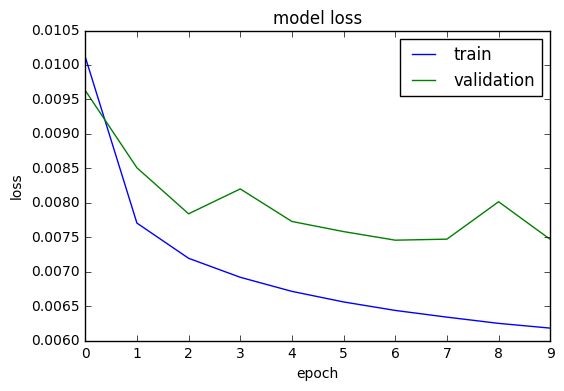

In [116]:
plot_train(hist)

In [1214]:
preds = np.squeeze(model_pkl.predict(map_valid_pkl, 1024))

In [1222]:
y_orig_pkl_val = log_max_inv(y_pkl_val, max_log_y_pkl)

In [1224]:
rmspe(log_max_inv(preds, max_log_y_pkl), y_orig_pkl_val)

0.11084739924546773

## XGBoost

In [566]:
X_train = np.concatenate([cat_map_train, contin_map_train], axis=1)

In [567]:
X_valid = np.concatenate([cat_map_valid, contin_map_valid], axis=1)

In [568]:
all_vars = cat_vars + contin_vars

In [569]:
xgb_parms = {'learning_rate': 0.1, 'subsample': 0.6, 
             'colsample_bylevel': 0.6, 'silent': True, 'objective': 'reg:linear'}

In [570]:
xdata = xgboost.DMatrix(X_train, y_train, feature_names=all_vars)

In [571]:
xdata_val = xgboost.DMatrix(X_valid, y_valid, feature_names=all_vars)

In [572]:
xgb_parms['seed'] = random.randint(0,1e9)
model = xgboost.train(xgb_parms, xdata)

In [938]:
model.eval(xdata_val)

b'[0]\teval-rmse:0.116686'

In [703]:
model.eval(xdata_val)

b'[0]\teval-rmse:0.117752'

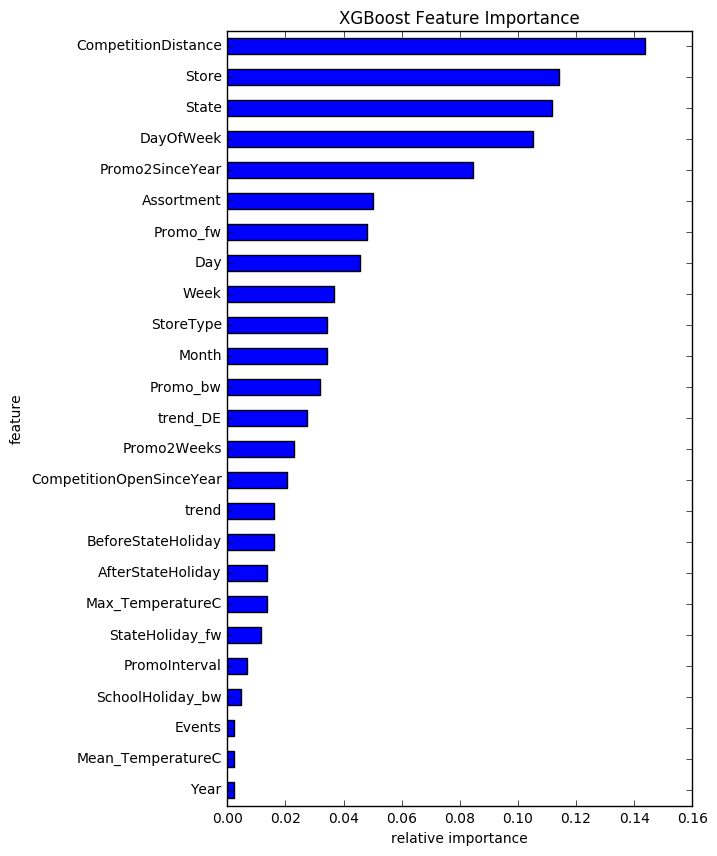

In [573]:
importance = model.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1))

df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance');

## End